In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pycascades as pc
import networkx as nx
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

We first collect all the inputs.

In [4]:
cusp_element_0 = pc.cusp( a = -4, b = 1, c = 0, x_0 = 0.5 )
coupling_0 = pc.linear_coupling(strength = 0.2)
coupling_1 = pc.linear_coupling(strength = -0.4)

#Network Specifications
size = 15
degree = 3
rewiring_ws = 0.15
t_step = 1
t_end = 199


Erdös-Rényi

In [9]:
G = nx.erdos_renyi_graph(size, degree/size, directed = True, seed = None)
net = pc.gen.networks.from_nxgraph( G, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1])
while net.number_of_edges() / net.number_of_nodes() < 2.9 or net.number_of_edges() / net.number_of_nodes() > 3.1:
	G = nx.erdos_renyi_graph(size, degree/size, directed = True, seed = None)
	net = pc.gen.networks.from_nxgraph( G, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1])
net_size = net.number_of_nodes()
initial_state = np.zeros(net_size)
node = 0
ev = pc.evolve( net , initial_state )
c = net.nodes[node]['data'].get_par()['c']
net.set_param( node, 'c', 0.2 )
ev.integrate(t_step, t_end)
output_er = []
for i in range(0, len(ev.get_timeseries()[1])):
	output_er.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
output_er = np.array(output_er)


#Create a cool network
while output_er[-1][1] < 4 or output_er[-1][1] > 8:
	G = nx.erdos_renyi_graph(size, degree/size, directed = True, seed = None)
	net = pc.gen.networks.from_nxgraph( G, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1])
	while net.number_of_edges() / net.number_of_nodes() < 2.9 or net.number_of_edges() / net.number_of_nodes() > 3.1:
		G = nx.erdos_renyi_graph(size, degree/size, directed = True, seed = None)
		net = pc.gen.networks.from_nxgraph( G, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1])
	net_size = net.number_of_nodes()
	initial_state = np.zeros(net_size)
	node = 0
	ev = pc.evolve( net , initial_state )
	c = net.nodes[node]['data'].get_par()['c']
	net.set_param( node, 'c', 0.2 )
	ev.integrate(t_step, t_end)

	output_er = []
	for i in range(0, len(ev.get_timeseries()[1])):
		output_er.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
	output_er = np.array(output_er)



Watts-Strogatz

In [10]:
net = pc.gen.networks.directed_watts_strogatz_graph(size, degree, rewiring_ws, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1] )
net_size = net.number_of_nodes()
initial_state = np.zeros(net_size)
node = 0
ev = pc.evolve( net , initial_state )
c = net.nodes[node]['data'].get_par()['c']
net.set_param( node, 'c', 0.2 )
ev.integrate(t_step, t_end)
output_ws = []
for i in range(0, len(ev.get_timeseries()[1])):
	output_ws.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
output_ws = np.array(output_ws)

#Create a cool network
while output_ws[-1][1] < 4 or output_ws[-1][1] > 8:
	net = pc.gen.networks.directed_watts_strogatz_graph(size, degree, rewiring_ws, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1] )
	net_size = net.number_of_nodes()
	initial_state = np.zeros(net_size)
	node = 0
	ev = pc.evolve( net , initial_state )
	c = net.nodes[node]['data'].get_par()['c']
	net.set_param( node, 'c', 0.2 )
	ev.integrate(t_step, t_end)

	output_ws = []
	for i in range(0, len(ev.get_timeseries()[1])):
		output_ws.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
	output_ws = np.array(output_ws)


Barabasi-Albert

In [11]:
net = pc.gen.networks.directed_barabasi_albert_graph(size, degree, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1] )
net_size = net.number_of_nodes()
initial_state = np.zeros(net_size)
node = 0
ev = pc.evolve( net , initial_state )
c = net.nodes[node]['data'].get_par()['c']
net.set_param( node, 'c', 0.2 )
ev.integrate(t_step, t_end)
output_ba = []
for i in range(0, len(ev.get_timeseries()[1])):
	output_ba.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
output_ba = np.array(output_ba)

#Create a cool network
while output_ba[-1][1] < 4 or output_ba[-1][1] > 8:
	net = pc.gen.networks.directed_barabasi_albert_graph(size, degree, element_pool = [cusp_element_0], coupling_pool = [coupling_0, coupling_1] )
	net_size = net.number_of_nodes()
	initial_state = np.zeros(net_size)
	node = 0
	ev = pc.evolve( net , initial_state )
	c = net.nodes[node]['data'].get_par()['c']
	net.set_param( node, 'c', 0.2 )
	ev.integrate(t_step, t_end)

	output_ba = []
	for i in range(0, len(ev.get_timeseries()[1])):
		output_ba.append([i, net.get_number_tipped(ev.get_timeseries()[1][i,:])])
	output_ba = np.array(output_ba)


Plotting the results.

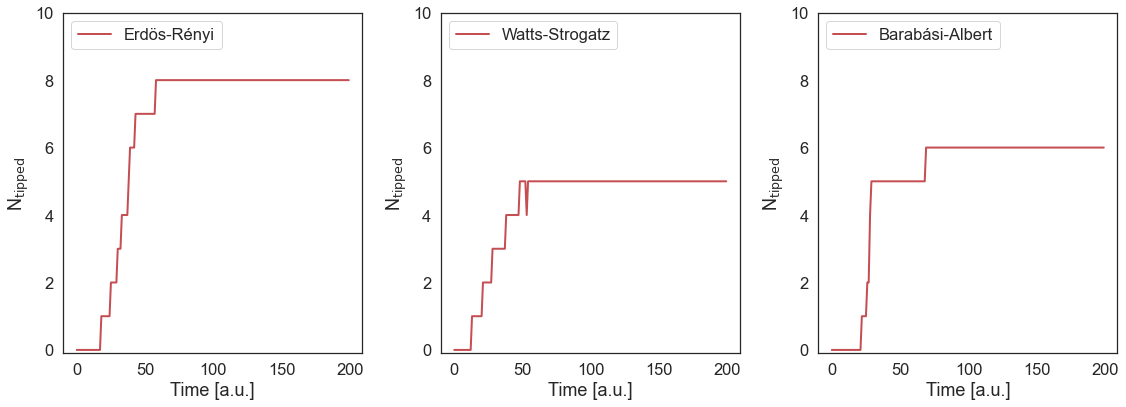

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6)) #(default: 8, 6)

ax0.plot(output_er.T[0], output_er.T[1], color="#C44E52", linewidth=2.0, label="Erdös-Rényi")
ax0.set_xlabel("Time [a.u.]")
ax0.set_ylabel("N$_\mathrm{tipped}$")
ax0.legend(loc="upper left")
ax0.set_ylim([-0.1, 10])

ax1.plot(output_ws.T[0], output_ws.T[1], color="#C44E52", linewidth=2.0, label="Watts-Strogatz")
ax1.set_xlabel("Time [a.u.]")
ax1.set_ylabel("N$_\mathrm{tipped}$")
ax1.legend(loc="upper left")
ax1.set_ylim([-0.1, 10])

ax2.plot(output_ba.T[0], output_ba.T[1], color="#C44E52", linewidth=2.0, label="Barabási-Albert")
ax2.set_xlabel("Time [a.u.]")
ax2.set_ylabel("N$_\mathrm{tipped}$")
ax2.legend(loc="upper left")
ax2.set_ylim([-0.1, 10])

fig.tight_layout()
plt.show()